## About Dataset


### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Column Information

#### People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise



### Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

### Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target

Need to perform clustering to summarize customer segments.

In [1]:
import datetime
from datetime import date

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#READ THE DASTASET....
df = pd.read_csv("marketing_campaign01.csv",sep = "\t")

In [5]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.shape

(2240, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
#CHECKING THE BASIC STATICTICS OF THE ALL COLUMNS
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

since there are some missing values in income we will check that column and replace missing values with mean or median...

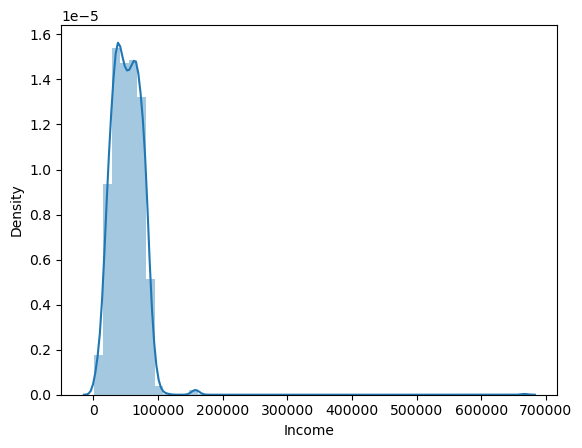

In [11]:
sns.distplot(df["Income"])
plt.show()

Here data is left skewed we will replace the missing values with median...

In [12]:
#Fill the missing values with the median values...
df['Income'] = df['Income'].fillna(df['Income'].median())

In [13]:
df["Income"].isna().sum()

0

In [14]:
#Checking the number of unique values present in each columns...
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [15]:
df[['Z_CostContact','Z_Revenue']]

,Z_CostContact,Z_Revenue
0,3,11
1,3,11
2,3,11
3,3,11
4,3,11
...,...,...
2235,3,11
2236,3,11
2237,3,11
2238,3,11


In above cell "Z_CostContact " and "Z_Revenue " have same value in all the rows that's why, they are not going to contribute anthing in the model building. So we can drop this columns... 

In [16]:
df = df.drop(columns = ['Z_CostContact','Z_Revenue'], axis = 1)

In [17]:
df.shape

(2240, 27)

In [18]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

## Univariate Analysis :-

### 1.Analysis on Year_birth variable...

In [19]:
df['Year_Birth'].dtype

dtype('int64')

In [20]:
#Checking number of unique categories present in the "Year_Birth"...
print("Unique categories present in the Year_Birth :",df['Year_Birth'].value_counts())

Unique categories present in the Year_Birth : 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


In [21]:
def unique_val(col):
    plt.figure(figsize=(20, 8))
    sns.countplot(df[col])
    

    plt.xticks(fontsize = 15)
    plt.show()

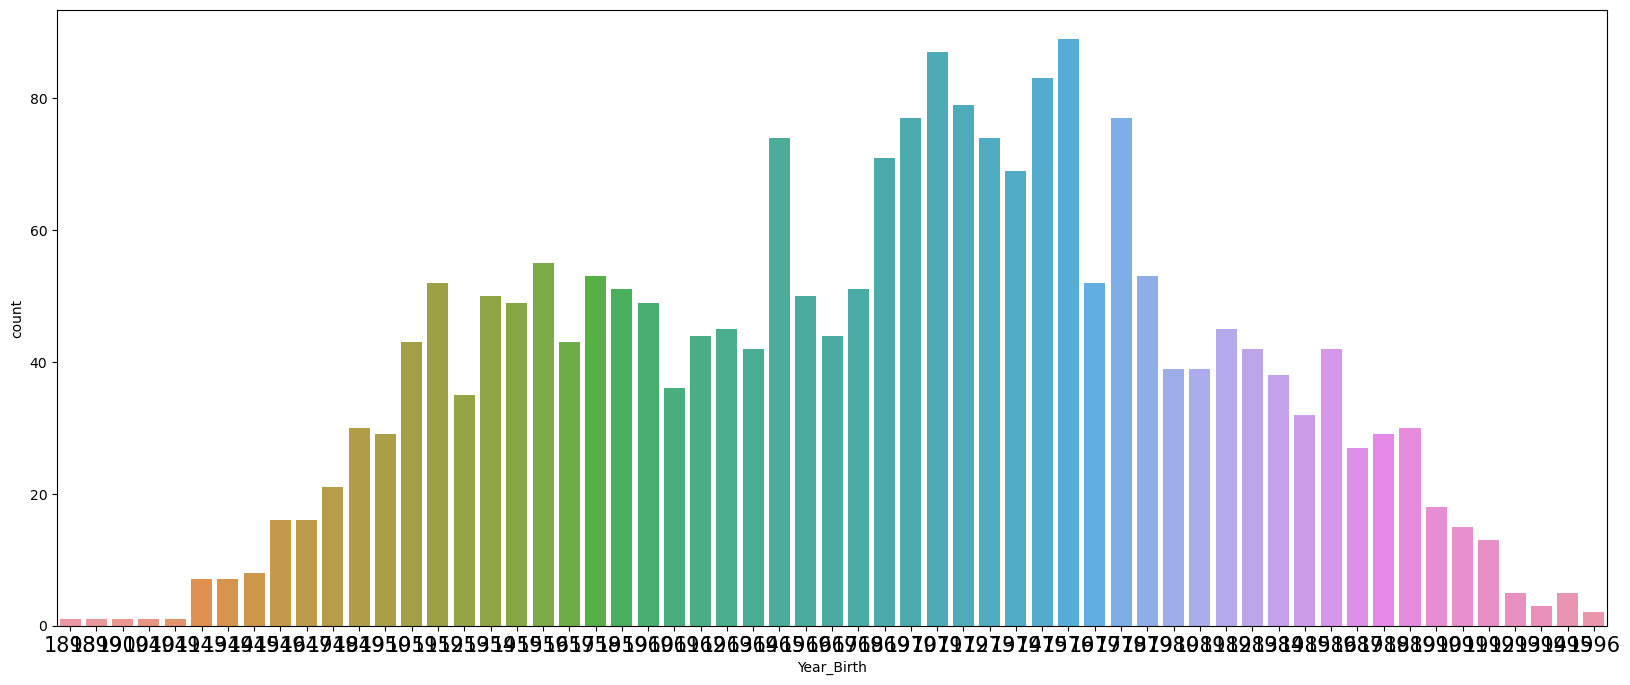

In [22]:
unique_val('Year_Birth')

So, Here data points in this column "Year_Birth" is uniformaly distributed

### 2.Analysis on Education variable...

In [23]:
#Check the unique values in the Education column...
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [24]:
#Chaning categories into "Under Graduate" And "Post Graduate"...
df['Education']=df['Education'].replace(["Graduation","PhD","Master","2n Cycle"], 'Post Graduate')
df["Education"]=df['Education'].replace(["Basic"], 'Under Graduate')

In [25]:
df["Education"].value_counts()

Post Graduate     2186
Under Graduate      54
Name: Education, dtype: int64

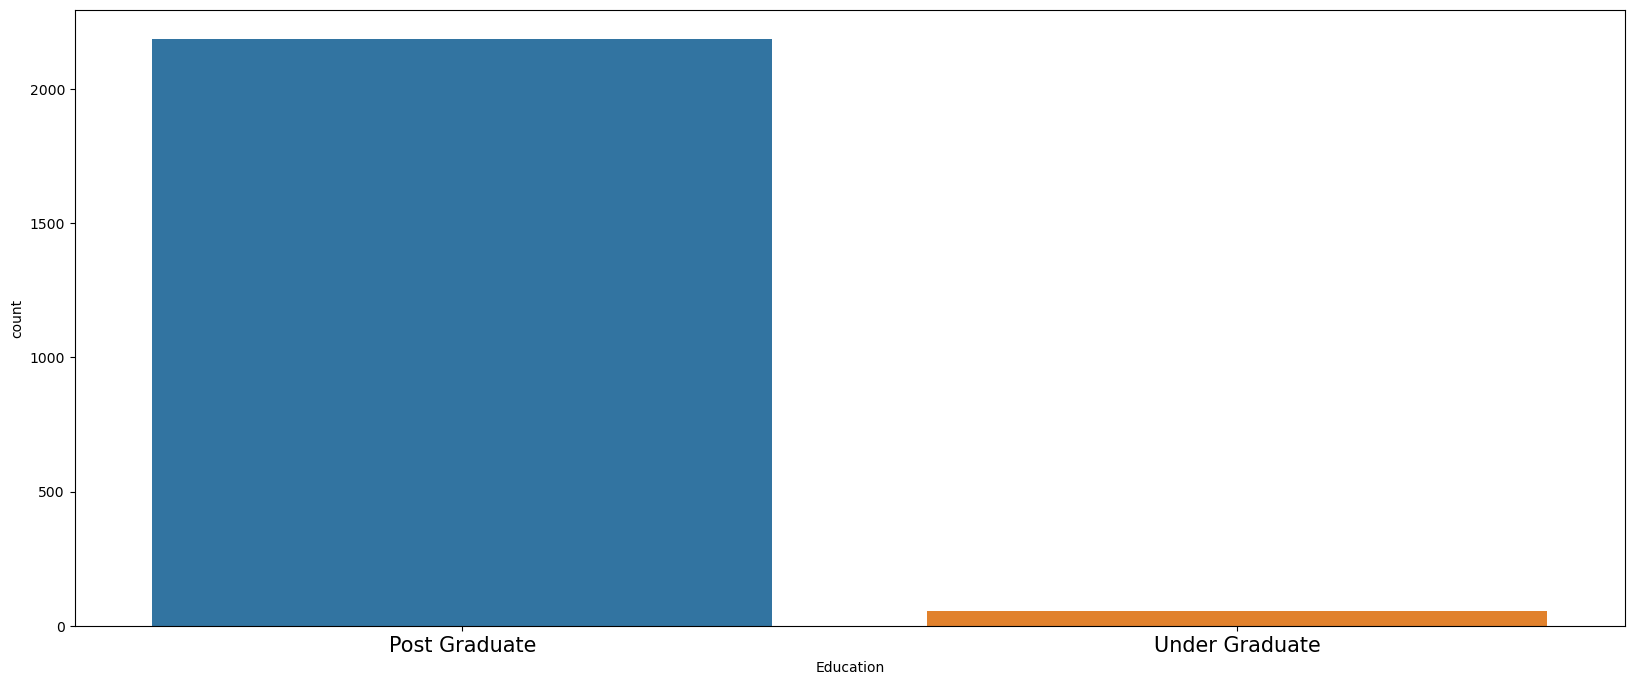

In [26]:
unique_val('Education')

So, here we observed that most of the data points are Post Graduated

### 3.Analysis on Marital_Status variable...

In [27]:
#Check the unique values in the Education column...
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [28]:
#We are changing categories into "Relationship" & "Single"...
df['Marital_Status'] = df['Marital_Status'].replace(["Together","Married"],"Relationship")
df['Marital_Status'] = df['Marital_Status'].replace(["Single","Divorced","Widow","Alone","Absurd","YOLO"],"Single")

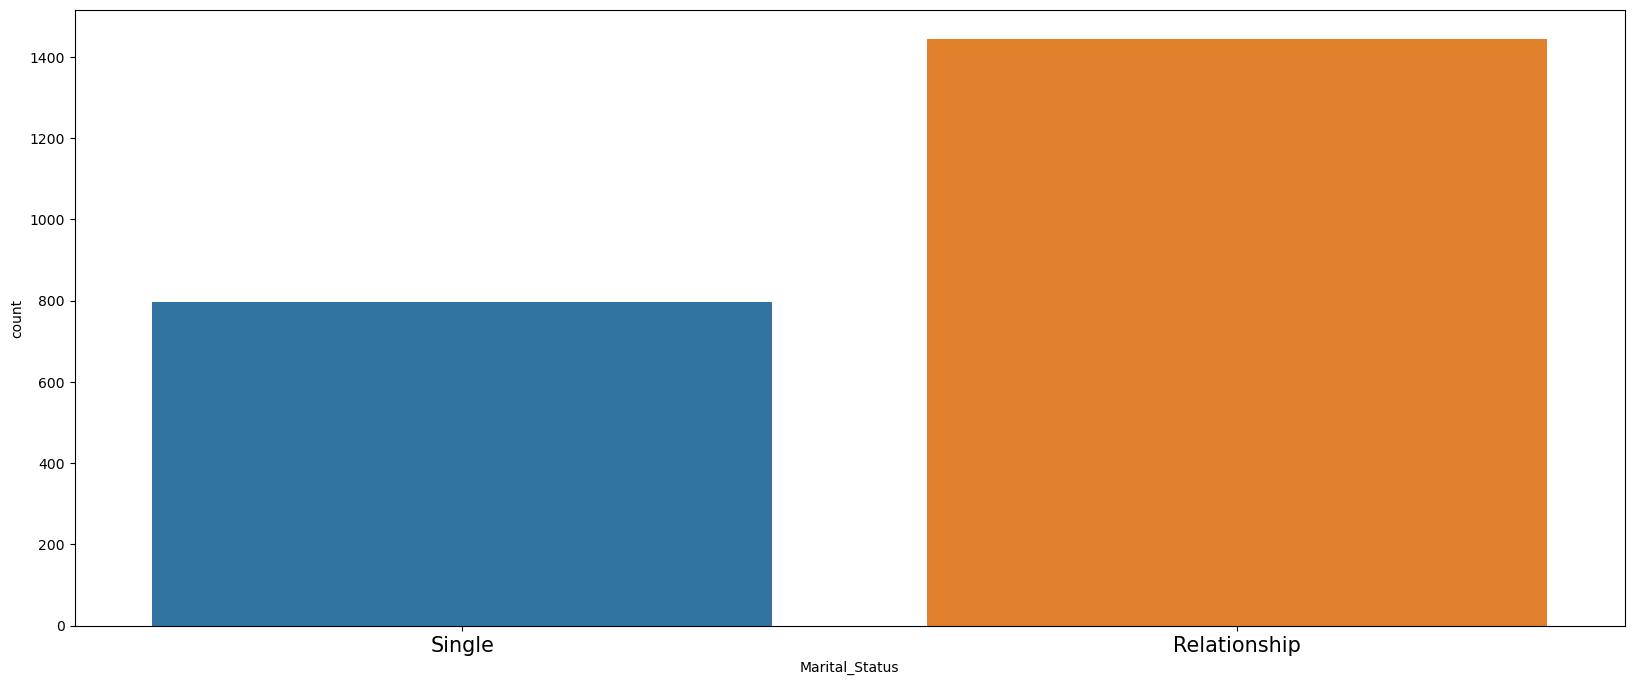

In [29]:
unique_val("Marital_Status")

In [30]:
df["Marital_Status"].value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [31]:
total_customers = 2240
num_Rel = 1444   #number of customers in relationship
num_Single = 796 #number of customers are Single

percentage_of_Rel = (num_Rel / total_customers) * 100  
print( percentage_of_Rel, "% of Customers in the dataset are in Relationship")

percentage_of_Single = (num_Single / total_customers) * 100  
print( percentage_of_Single, "% of Customers in the dataset are Single")

64.46428571428572 % of Customers in the dataset are in Relationship
35.535714285714285 % of Customers in the dataset are Single


### 4.Analysis on Income variable...

In [32]:
df["Income"].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

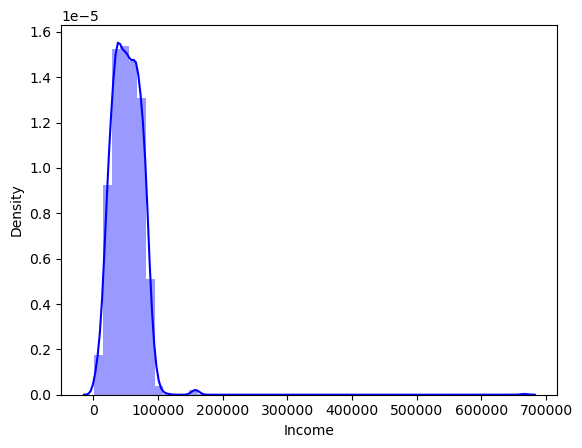

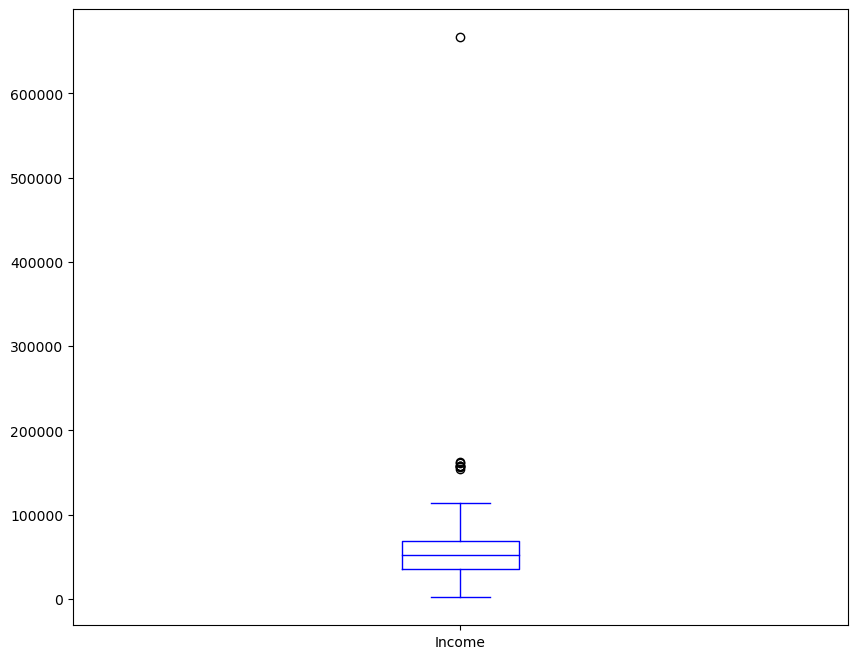

In [33]:
#Perform the Destribution and Box plot
sns.distplot(df["Income"],color= 'blue')
plt.show()

df["Income"].plot.box(figsize = (10,8),color = "blue")
plt.show()

so, we saw here the data was left skewed into the destribution plot and it has some outliers that we will treat it in later stage while model building...

### 5.Analysis on 'Kidhome', 'Teenhome' variable...

In [34]:
#Unique values
df["Kidhome"].unique()   #it has only three unique values

array([0, 1, 2], dtype=int64)

In [35]:
df["Teenhome"].unique()

array([0, 1, 2], dtype=int64)

In [36]:
#combining different dataframe into a single column to reduce the number of dimension...
df["kids"] = df["Kidhome"] + df["Teenhome"]

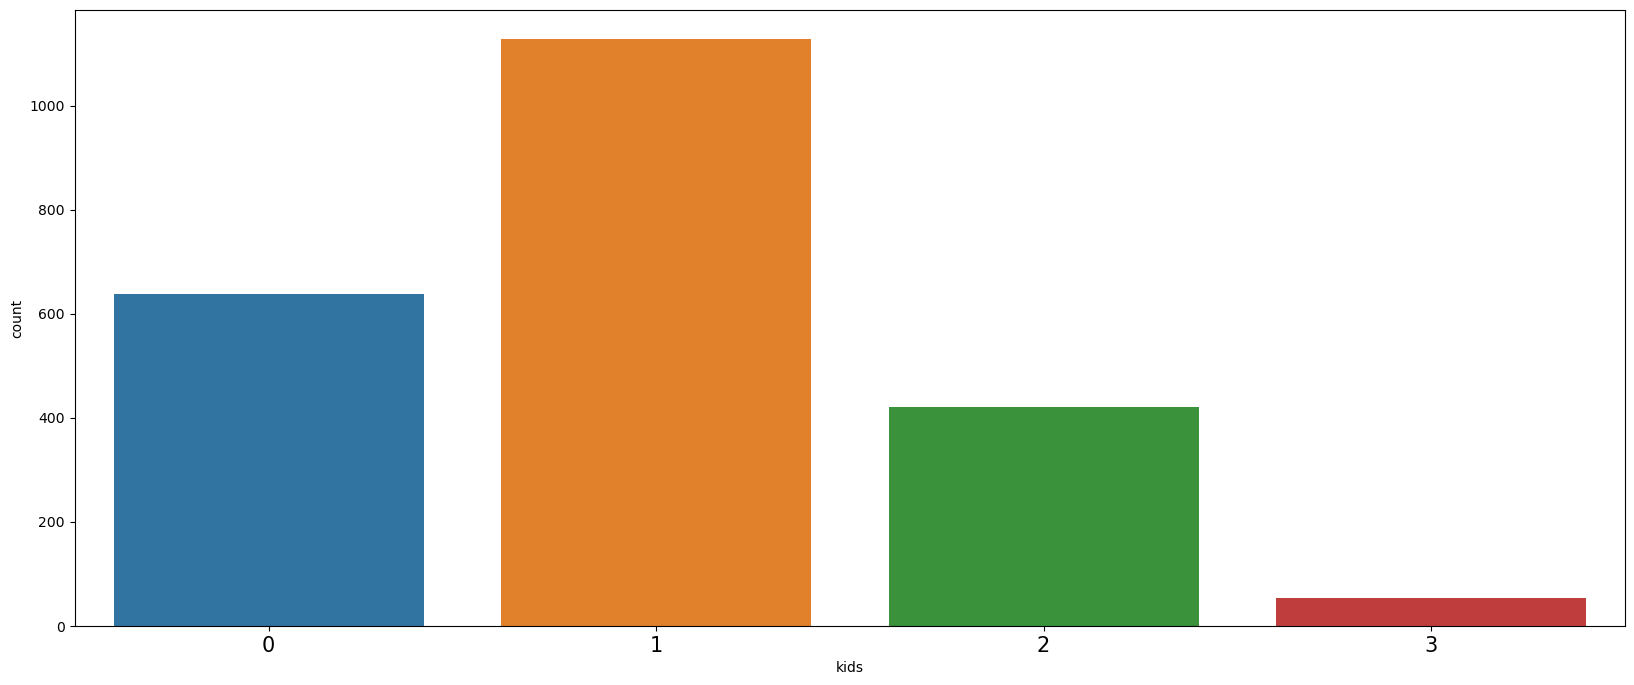

In [37]:
unique_val('kids')

In [38]:
df["kids"].value_counts()

1    1128
0     638
2     421
3      53
Name: kids, dtype: int64

In [39]:
total_kids = df["kids"].value_counts().sum()
have_0_kid = 638   #number of customers have zero kid
have_1_kid = 1128  #number of customers have one kid
have_2_kids = 421   #number of customers have two kid
have_3_kids = 53    #number of customers have three kid


percentage_of_have_0_kid = (have_0_kid / total_kids) * 100  
print("{:.2f}% of Customers in the dataset have 0 kid".format(percentage_of_have_0_kid))

percentage_of_have_1_kid = (have_1_kid / total_customers) * 100  
print("{:.2f}% of Customers in the dataset have 1 kid".format(percentage_of_have_1_kid))

percentage_of_have_2_kids = (have_2_kids / total_customers) * 100  
print("{:.2f}% of Customers in the dataset have 2 kids".format(percentage_of_have_2_kids))

percentage_of_have_3_kids = (have_3_kids / total_customers) * 100  
print("{:.2f}% of Customers in the dataset have 3 kids".format(percentage_of_have_3_kids))


28.48% of Customers in the dataset have 0 kid
50.36% of Customers in the dataset have 1 kid
18.79% of Customers in the dataset have 2 kids
2.37% of Customers in the dataset have 3 kids


### 6.Analysis on 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', variable...

In [40]:
#combining all the dataframes into the single col to reduce the number of dimension 
df["Expenses"] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [41]:
df["Expenses"].head(15)

0     1617
1       27
2      776
3       53
4      422
5      716
6      590
7      169
8       46
9       49
10      19
11      61
12    1102
13     310
14      46
Name: Expenses, dtype: int64

In [42]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,kids,Expenses
0,5524,1957,Post Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,1,0,1617
1,2174,1954,Post Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,0,2,27
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,0,0,776
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,0,1,53
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,0,1,422


In [43]:
df["Expenses"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Expenses, dtype: float64

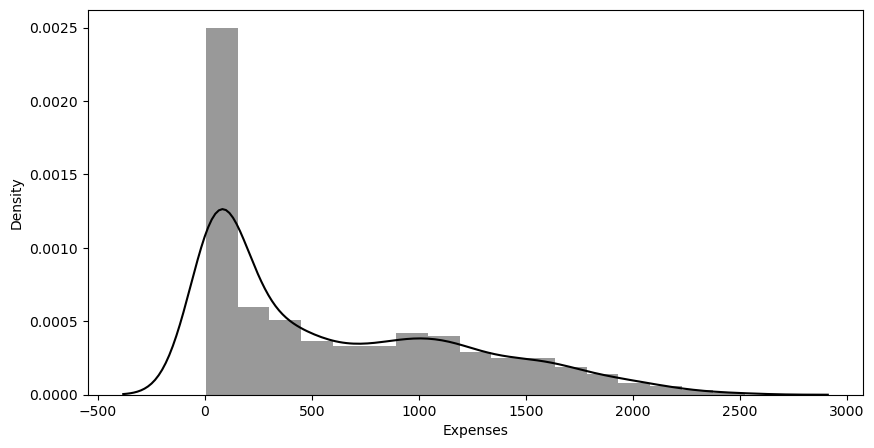

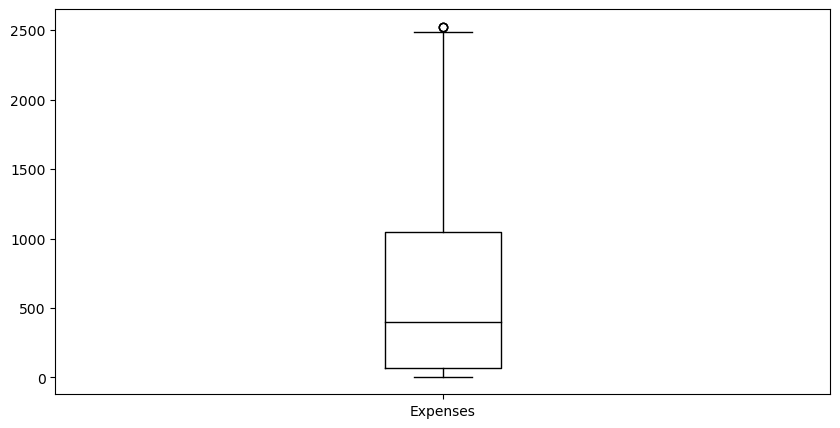

In [44]:
#Plot distplot and Box plot for Expenses
plt.figure(figsize= (10,5))
           
sns.distplot(df["Expenses"],color = "black")
plt.show()

df["Expenses"].plot.box(figsize=(10,5), color = "black")
plt.show()

The distribution of expenses is uniform

### 7.Analysis on 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' variable...

In [45]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [46]:
df['NumDealsPurchases'].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  0,  6,  9, 12,  8, 10, 13, 11],
      dtype=int64)

In [47]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [48]:
df['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

In [49]:
#Combine all the categories in single col...
df['TotalNumPurchases'] = df['NumWebPurchases']+df['NumDealsPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

In [50]:
#Unique categories in TotalNumPuraches...
df['TotalNumPurchases'].unique()


array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [51]:
df[['TotalNumPurchases']]

,TotalNumPurchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [52]:
df['TotalNumPurchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: TotalNumPurchases, dtype: float64

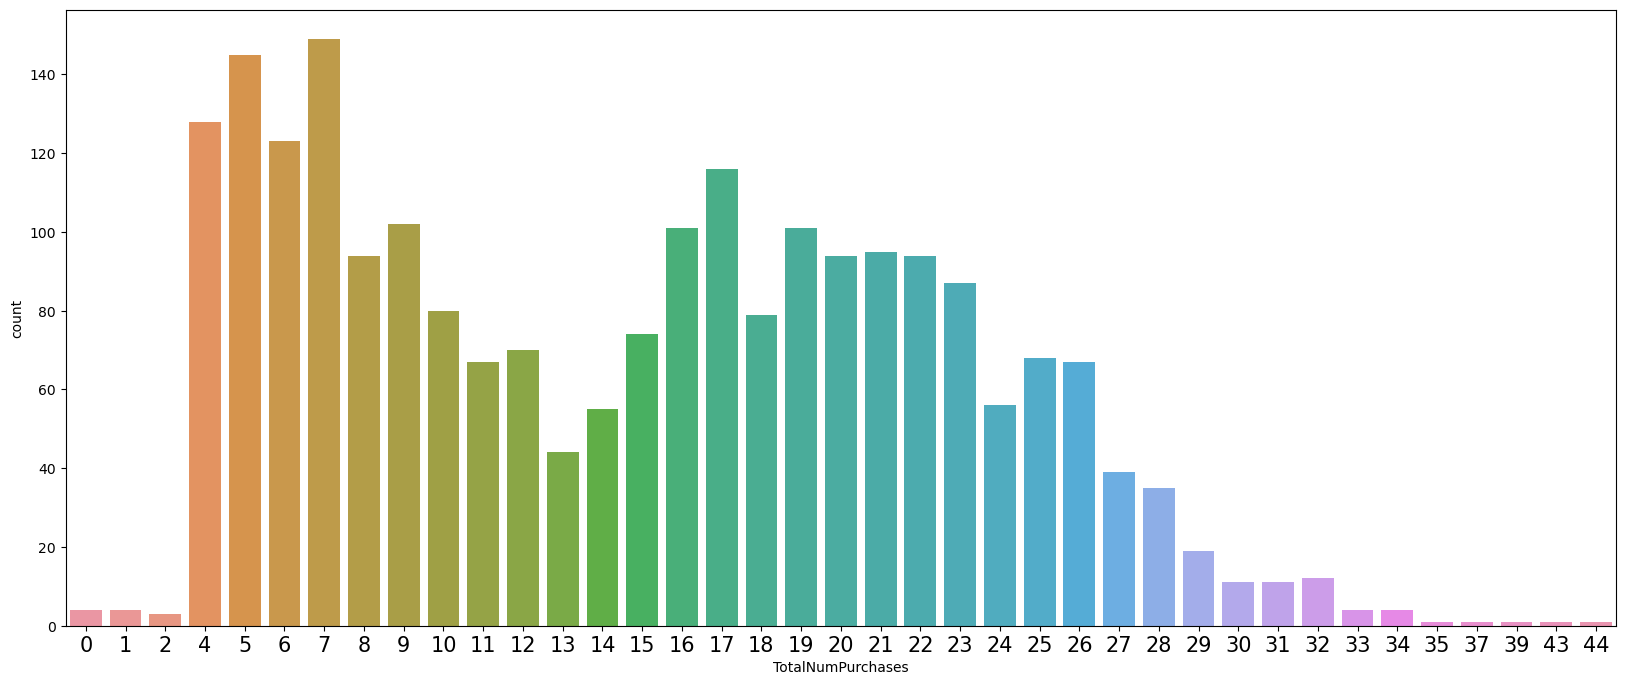

In [53]:
#plot the count plot
unique_val("TotalNumPurchases")

### 8.Analysis on AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2' variable...

In [54]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'kids', 'Expenses',
       'TotalNumPurchases'],
      dtype='object')

In [55]:
df[ 'AcceptedCmp1'].unique()

array([0, 1], dtype=int64)

In [56]:
df[ 'AcceptedCmp2'].unique()

array([0, 1], dtype=int64)

In [57]:
df['TotalAcceptedCmp']=df[ 'AcceptedCmp1']+df[ 'AcceptedCmp2']+df[ 'AcceptedCmp3']+df[ 'AcceptedCmp4']+df[ 'AcceptedCmp5']


Unique categories in TotalAcceptedCmp is : 0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64




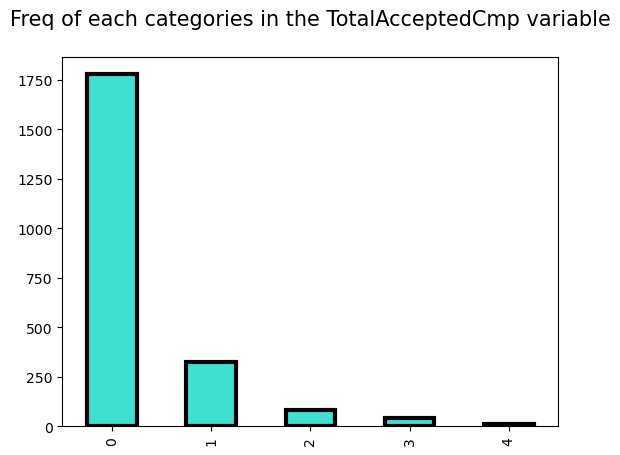

In [58]:
#checking number of unique categories in "TotalAcceptedCmp"
print("Unique categories in TotalAcceptedCmp is :",df['TotalAcceptedCmp'].value_counts())
print("\n")

#Visualizing the TotalAcceptedCmp
df['TotalAcceptedCmp'].value_counts().plot(kind = 'bar',color = 'turquoise', edgecolor = 'black',linewidth= 3 )
plt.title ("Freq of each categories in the TotalAcceptedCmp variable\n",fontsize = 15)
plt.show()

79.33% of customer accepted the offer in the campaign are "0".\
14.50% of customer accepted the offer in the campaign are "1".\
3.70% of customer accepted the offer in the campaign are "2".\
1.96% of customer accepted the offer in the campaign are "3".\
0.49% of customer accepted the offer in the campaign are "4".

In [59]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp
0,5524,1957,Post Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,1,0,1617,25,0
1,2174,1954,Post Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,2,27,6,0
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,776,21,0
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,1,53,8,0
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,1,422,19,0
5,7446,1967,Post Graduate,Relationship,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,0,0,1,716,22,0
6,965,1971,Post Graduate,Single,55635.0,0,1,13-11-2012,34,235,...,0,0,0,0,0,0,1,590,21,0
7,6177,1985,Post Graduate,Relationship,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,0,0,1,169,10,0
8,4855,1974,Post Graduate,Relationship,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,0,1,1,46,6,0
9,5899,1950,Post Graduate,Relationship,5648.0,1,1,13-03-2014,68,28,...,0,0,0,0,0,0,2,49,2,1


In [60]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'kids', 'Expenses',
       'TotalNumPurchases', 'TotalAcceptedCmp'],
      dtype='object')

In [61]:
#### 9.Converting the Year_Birth to CustomerAge....
df['CustomerAge']= (pd.Timestamp('now').year) - df["Year_Birth"]

In [62]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge
0,5524,1957,Post Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,1,0,1617,25,0,66
1,2174,1954,Post Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,2,27,6,0,69
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,776,21,0,58
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,1,53,8,0,39
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,1,422,19,0,42


<Figure size 1000x800 with 0 Axes>

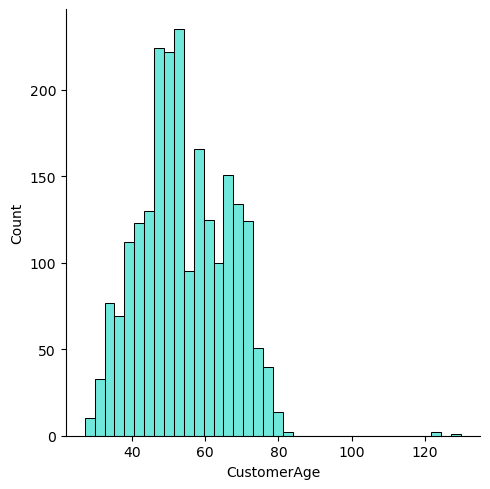

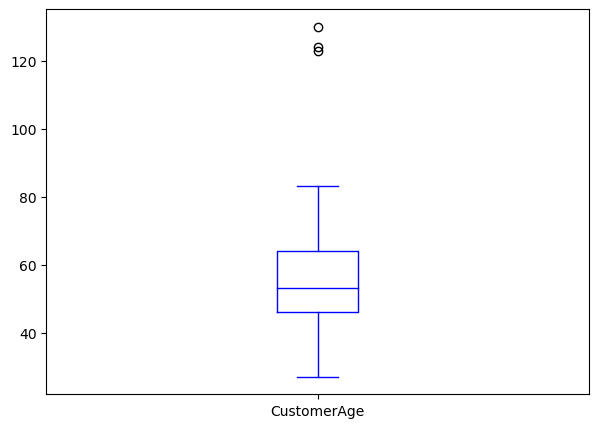

In [63]:
# ploting distribution plot 
plt.figure(figsize=(10,8))
sns.displot(df['CustomerAge'],color ='turquoise')
plt.show()

df["CustomerAge"].plot.box(figsize = (7,5),color = "blue")
plt.show()


 Most of the customers are in the mid middle age that is from 35 to 55

In [64]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge
0,5524,1957,Post Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,1,0,1617,25,0,66
1,2174,1954,Post Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,2,27,6,0,69
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,776,21,0,58
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,1,53,8,0,39
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,1,422,19,0,42


In [65]:
#columns to delete will drop all those customer from where we have already taken, 
# out the information and made a new columns will drop these cols.
del_columns = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df = df.drop(columns = del_columns , axis = 1)

In [66]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge
0,Post Graduate,Single,58138.0,04-09-2012,58,0,1,0,1617,25,0,66
1,Post Graduate,Single,46344.0,08-03-2014,38,0,0,2,27,6,0,69
2,Post Graduate,Relationship,71613.0,21-08-2013,26,0,0,0,776,21,0,58
3,Post Graduate,Relationship,26646.0,10-02-2014,26,0,0,1,53,8,0,39
4,Post Graduate,Relationship,58293.0,19-01-2014,94,0,0,1,422,19,0,42


In [67]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Complain', 'Response', 'kids', 'Expenses', 'TotalNumPurchases',
       'TotalAcceptedCmp', 'CustomerAge'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Dt_Customer        2240 non-null   object 
 4   Recency            2240 non-null   int64  
 5   Complain           2240 non-null   int64  
 6   Response           2240 non-null   int64  
 7   kids               2240 non-null   int64  
 8   Expenses           2240 non-null   int64  
 9   TotalNumPurchases  2240 non-null   int64  
 10  TotalAcceptedCmp   2240 non-null   int64  
 11  CustomerAge        2240 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 210.1+ KB


In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [69]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer..
print("The newest customers enrolment date in the records: ",max(dates))
print("The oldest customers enrolment date in the records: ",min(dates))

The newest customers enrolment date in the records:  2014-12-06
The oldest customers enrolment date in the records:  2012-01-08


In [70]:
dates

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 8, 5),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 3, 11),
 datetime.date(2012, 8, 8),
 datetime.date(2013, 6, 1),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 11, 1),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 2, 1),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 11, 5),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.

Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the latest recorded date

In [71]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df['Customer_For'] = df['Customer_For'].apply(lambda x:x.days)

In [72]:
df["Customer_For"].describe()

count    2240.000000
mean      512.043304
std       232.229893
min         0.000000
25%       340.750000
50%       513.000000
75%       685.250000
max      1063.000000
Name: Customer_For, dtype: float64

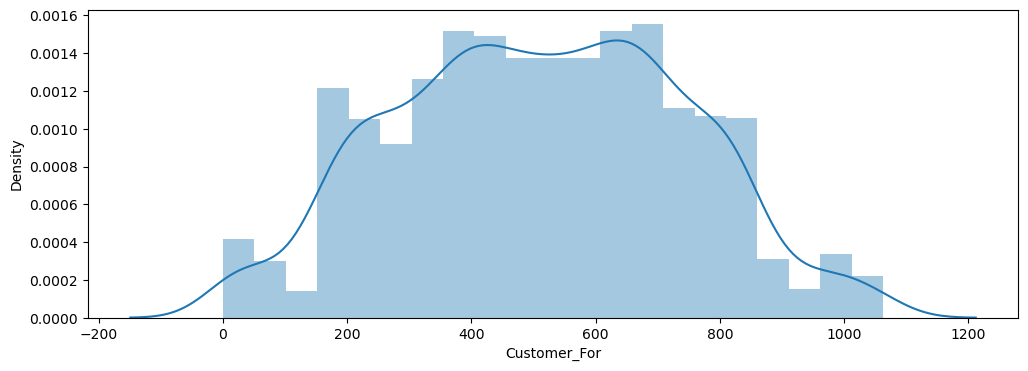

In [73]:
plt.figure( figsize = (12,4))
sns.distplot(df['Customer_For'])
plt.show()

most of the customers are regular to the campaign for 200-800 days...

In [74]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge,Customer_For
0,Post Graduate,Single,58138.0,2012-04-09,58,0,1,0,1617,25,0,66,971
1,Post Graduate,Single,46344.0,2014-08-03,38,0,0,2,27,6,0,69,125
2,Post Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,776,21,0,58,472
3,Post Graduate,Relationship,26646.0,2014-10-02,26,0,0,1,53,8,0,39,65
4,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,422,19,0,42,321


In [75]:
# So, here we drop the unnecessary columns 
df.drop(['Dt_Customer', 'Recency', 'Complain','Response'],axis = 1,inplace = True)

In [76]:
df.head()

,Education,Marital_Status,Income,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge,Customer_For
0,Post Graduate,Single,58138.0,0,1617,25,0,66,971
1,Post Graduate,Single,46344.0,2,27,6,0,69,125
2,Post Graduate,Relationship,71613.0,0,776,21,0,58,472
3,Post Graduate,Relationship,26646.0,1,53,8,0,39,65
4,Post Graduate,Relationship,58293.0,1,422,19,0,42,321


In [77]:
df.shape

(2240, 9)

# Bivariate Analysis :

### 1.Education VS Expenses

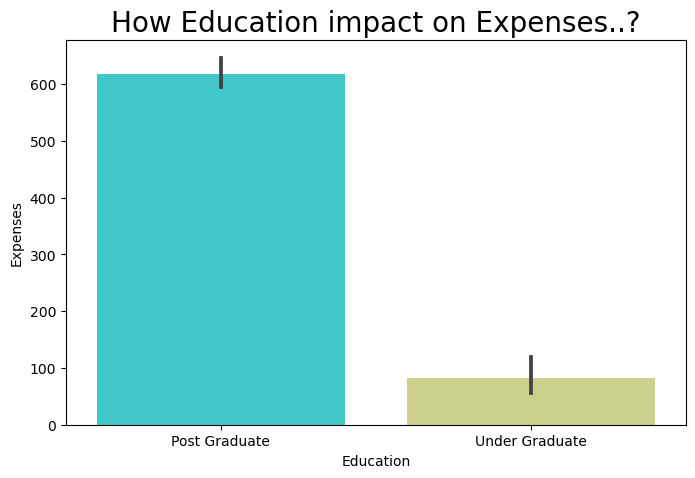

In [78]:
plt.figure(figsize = (8,5))
plt.title("How Education impact on Expenses..?",fontsize=  20)
ax = sns.barplot(x="Education" , y = "Expenses", data = df,palette = 'rainbow')

Here we observe that the Post graduated people spends more than undergraduated peoples...

### 2. Marital_Status VS Expenses

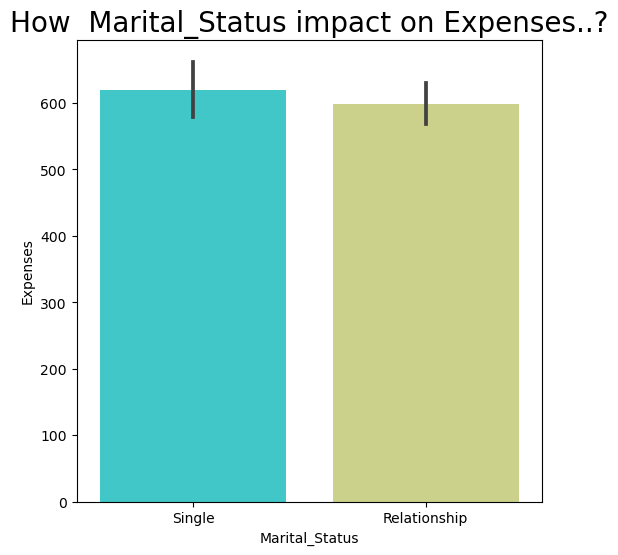

In [79]:
plt.figure(figsize = (6,6))
plt.title("How  Marital_Status impact on Expenses..?",fontsize=  20)
ax = sns.barplot(x="Marital_Status" , y = "Expenses", data = df,palette = 'rainbow')

Here we observe that single and married people have the same spending...

### 3.kids vs Expenses

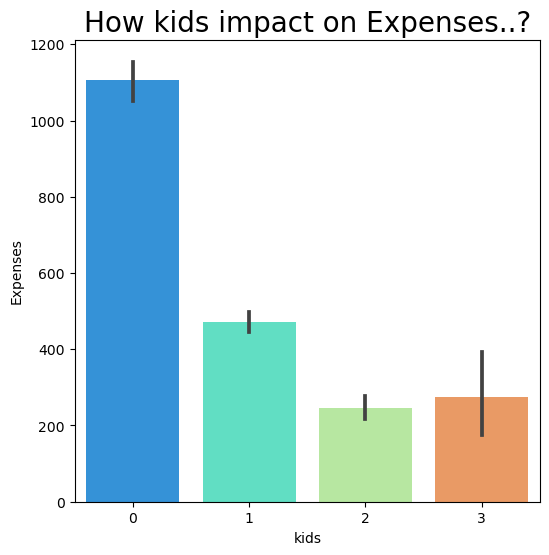

In [80]:
plt.figure(figsize = (6,6))
plt.title("How kids impact on Expenses..?",fontsize=  20)
ax = sns.barplot(x="kids" , y = "Expenses", data = df,palette = 'rainbow')

Here we observe some thing different that parents with 1 kid spends more than the parents who are having 2 or 3 kids

### 4. TotalAcceptedCmp VS Expenses

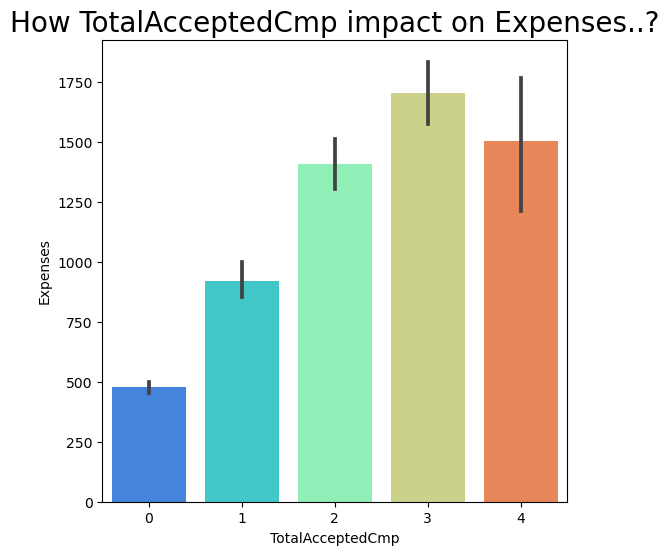

In [81]:
plt.figure(figsize = (6,6))
plt.title("How TotalAcceptedCmp impact on Expenses..?",fontsize=  20)
ax = sns.barplot(x="TotalAcceptedCmp" , y = "Expenses", data = df,palette = 'rainbow')

those who accepeted more campaign have more expenses

### 4. TotalNumPurchases VS Expenses

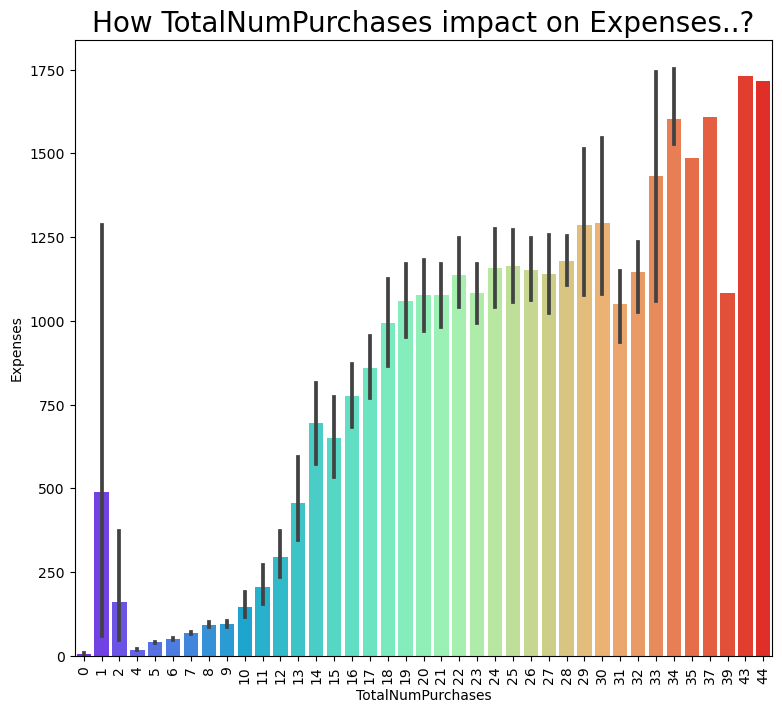

In [82]:
plt.figure(figsize = (9,8))
plt.title("How TotalNumPurchases impact on Expenses..?",fontsize=  20)
plt.xticks(rotation=90)

ax = sns.barplot(x="TotalNumPurchases" , y = "Expenses", data = df,palette = 'rainbow')

Those who have more purchases have more expenses

### 5. Customer_For VS Expenses

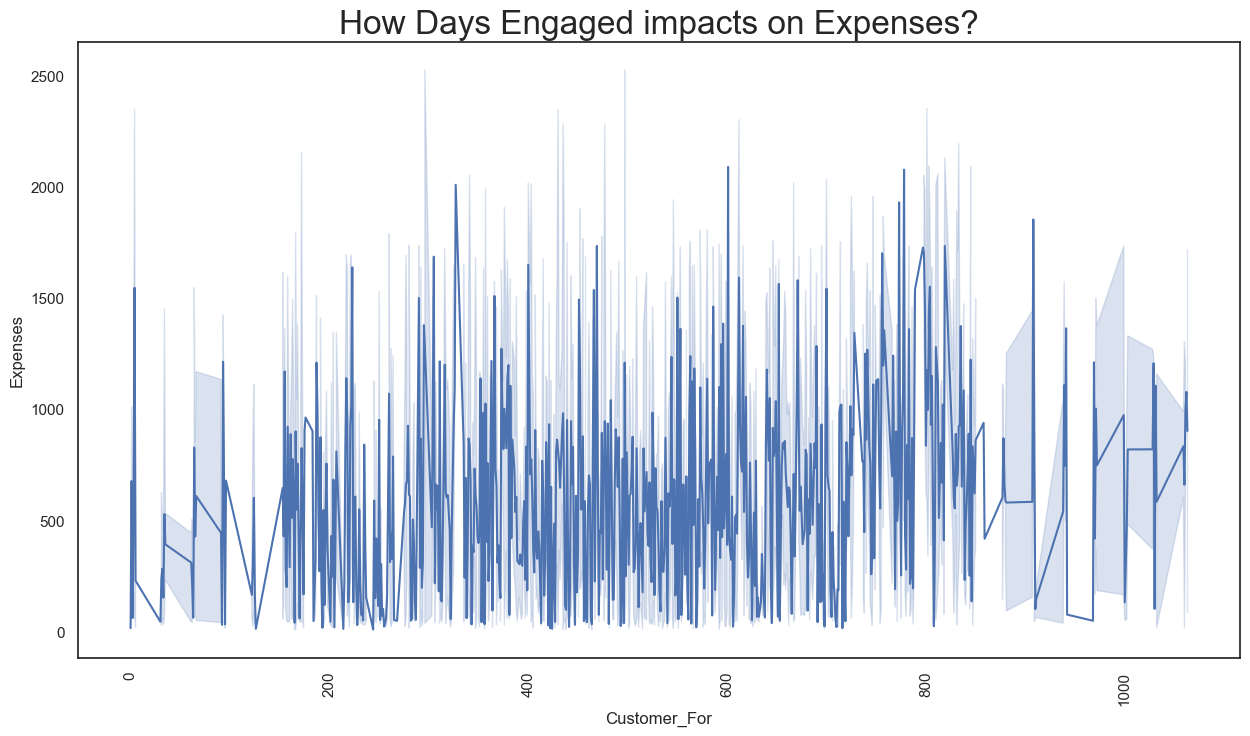

In [83]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Days Engaged impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.lineplot(x="Customer_For", y="Expenses", data=df,palette="rainbow")

Here No relationship between days enagaged  vs expenses, so we plot scatter plot...

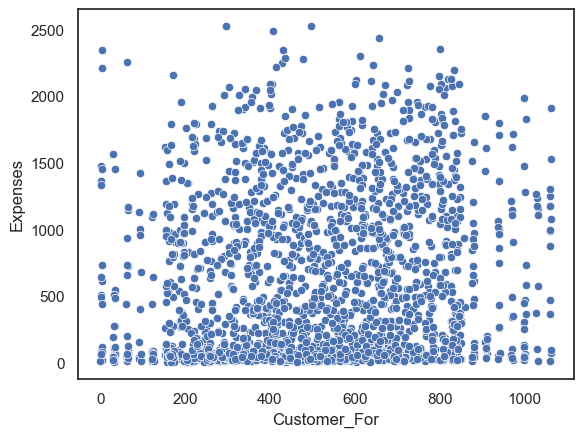

In [84]:
sns.scatterplot(df['Customer_For'],df['Expenses'])
plt.show()

 No relationship between days enagaged  vs expenses...

### 6.CustomerAge VS Expenses

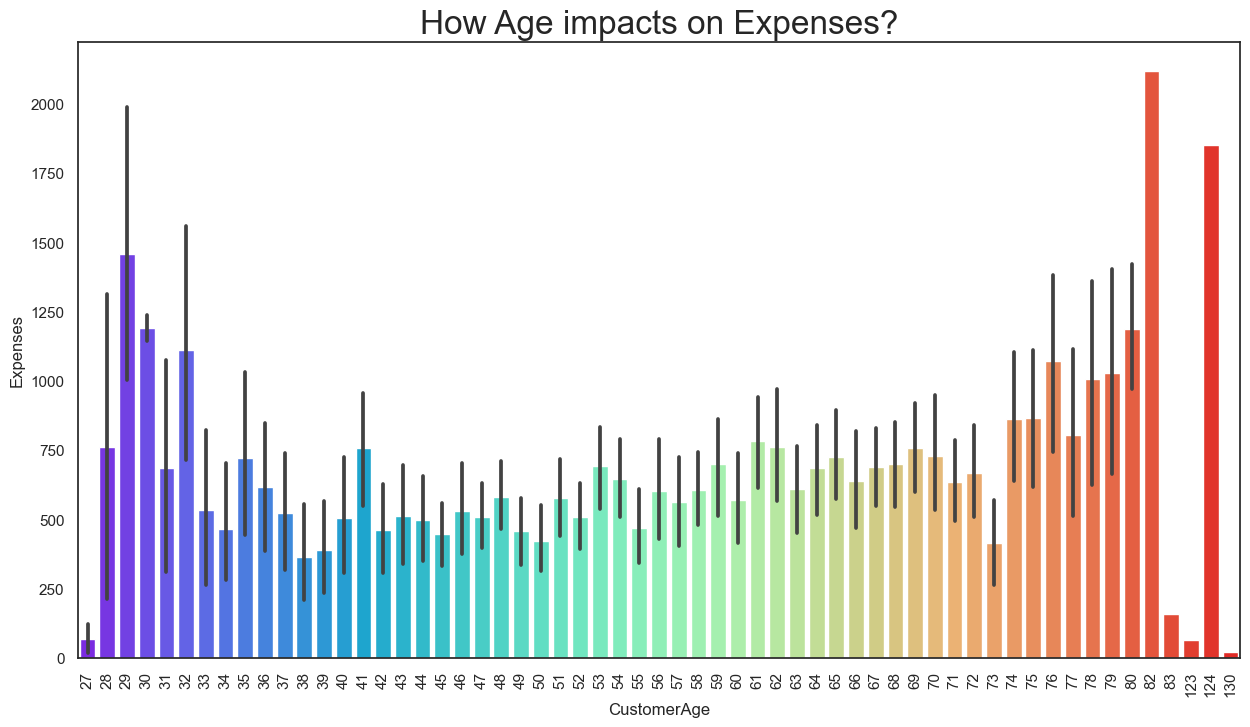

In [85]:
sns.set_theme(style="white")
plt.figure(figsize=(15,8))
plt.title("How Age impacts on Expenses?",fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="CustomerAge", y="Expenses", data=df,palette="rainbow")
plt.show()

People who are in middle age have less expenses than others

## Remove some outliers present in age and income

In [86]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [87]:
df['CustomerAge'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: CustomerAge, dtype: float64

In [88]:
df.shape

(2240, 9)

In [89]:
df = df[df['CustomerAge'] < 90]

In [90]:
df=df[df["Income"] < 300000]

In [91]:
df.shape

(2236, 9)

In [92]:
df.head()

,Education,Marital_Status,Income,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge,Customer_For
0,Post Graduate,Single,58138.0,0,1617,25,0,66,971
1,Post Graduate,Single,46344.0,2,27,6,0,69,125
2,Post Graduate,Relationship,71613.0,0,776,21,0,58,472
3,Post Graduate,Relationship,26646.0,1,53,8,0,39,65
4,Post Graduate,Relationship,58293.0,1,422,19,0,42,321


## Finding The Correlation

<AxesSubplot:>

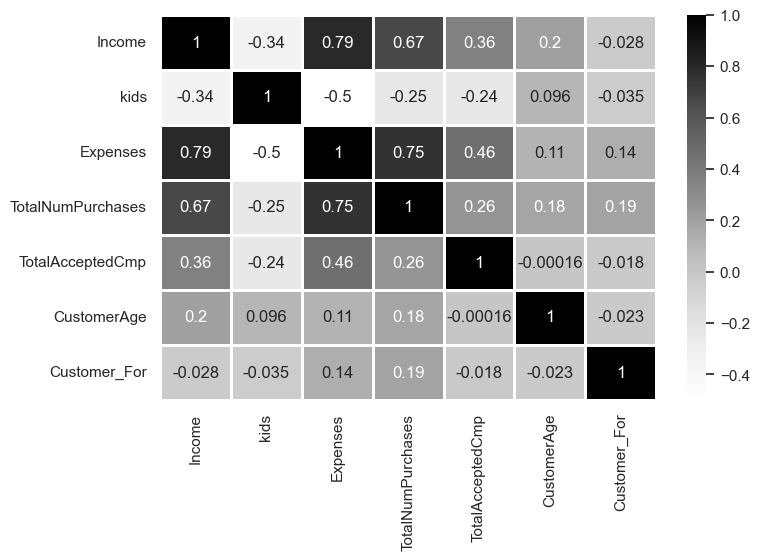

In [93]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),annot = True, cmap = 'Greys',linewidth =1)


income is more positively correlated ot Expenses and Number of purchese...

Expenses is positively correlated to Income and number of purcheses and negatively correlated with Kids..

In [94]:
df.head()

,Education,Marital_Status,Income,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge,Customer_For
0,Post Graduate,Single,58138.0,0,1617,25,0,66,971
1,Post Graduate,Single,46344.0,2,27,6,0,69,125
2,Post Graduate,Relationship,71613.0,0,776,21,0,58,472
3,Post Graduate,Relationship,26646.0,1,53,8,0,39,65
4,Post Graduate,Relationship,58293.0,1,422,19,0,42,321


Here lable encoding columns are Education and Marital_status . will replace this columns with 0 and 1.

In [95]:
#import label encoder
from sklearn import preprocessing

#Label encoder objects knows how to understand word labels...
label_encoder = preprocessing.LabelEncoder()

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [96]:
df.head()

,Education,Marital_Status,Income,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge,Customer_For
0,0,1,58138.0,0,1617,25,0,66,971
1,0,1,46344.0,2,27,6,0,69,125
2,0,0,71613.0,0,776,21,0,58,472
3,0,0,26646.0,1,53,8,0,39,65
4,0,0,58293.0,1,422,19,0,42,321


here replace post_graduated with 0 and under graduated with 1\
marrital_status we have replace singles with 1 and relationship with 0

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
col_scale= ['Income','kids','Expenses','TotalNumPurchases','TotalAcceptedCmp','CustomerAge','Customer_For']
df[col_scale] = scaler.fit_transform(df[col_scale])

In [98]:
df.head()

,Education,Marital_Status,Income,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge,Customer_For
0,0,1,0.288947,-1.264308,1.680176,1.319340,-0.438933,1.016868,1.975467
1,0,1,-0.262003,1.395139,-0.962202,-1.155857,-0.438933,1.273264,-1.667017
2,0,0,0.918423,-1.264308,0.282541,0.798246,-0.438933,0.333146,-0.172996
3,0,0,-1.182183,0.065416,-0.918994,-0.895310,-0.438933,-1.290693,-1.925349
4,0,0,0.296187,0.065416,-0.305762,0.537699,-0.438933,-1.034298,-0.823131


# Model Building

## K - Means

In [99]:
#copy of the dataset
copy_data = df.copy()

In [100]:
from sklearn.cluster import KMeans

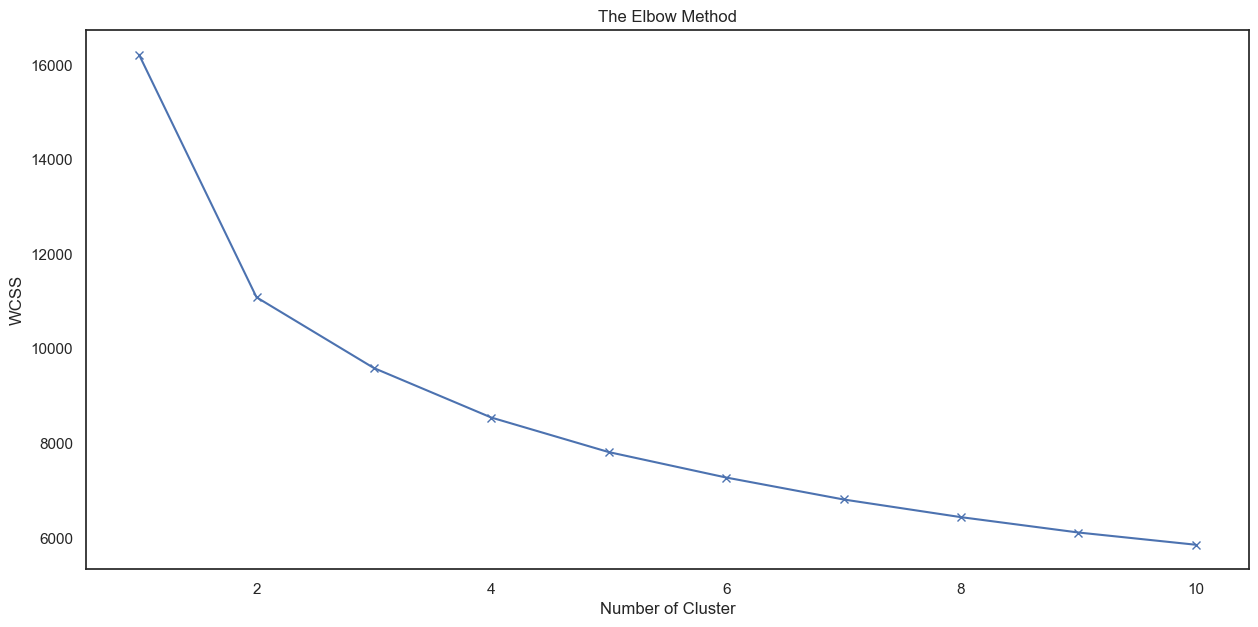

In [101]:
wcss = []
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state = 42)
    kmeans.fit(copy_data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15,7))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

So we can understand from the plot that cluster = 2 is the best...


In [102]:
#Training the predicting using k-means Algorithm...
kmeans = KMeans(n_clusters=2, random_state=42).fit(copy_data)
pred = kmeans.predict(copy_data)

#Appending those cluster value into main dataframe (without standard-scaler)
copy_data['cluster_Kmeans'] = pred + 1

In [103]:
copy_data.head()

,Education,Marital_Status,Income,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge,Customer_For,cluster_Kmeans
0,0,1,0.288947,-1.264308,1.680176,1.319340,-0.438933,1.016868,1.975467,1
1,0,1,-0.262003,1.395139,-0.962202,-1.155857,-0.438933,1.273264,-1.667017,2
2,0,0,0.918423,-1.264308,0.282541,0.798246,-0.438933,0.333146,-0.172996,1
3,0,0,-1.182183,0.065416,-0.918994,-0.895310,-0.438933,-1.290693,-1.925349,2
4,0,0,0.296187,0.065416,-0.305762,0.537699,-0.438933,-1.034298,-0.823131,2


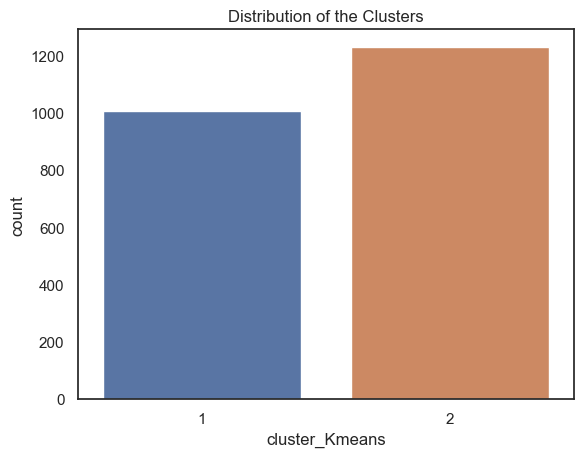

In [124]:
sns.countplot(x=copy_data['cluster_Kmeans'])
plt.title("Distribution of the Clusters")
plt.show()

<AxesSubplot:xlabel='Expenses', ylabel='Income'>

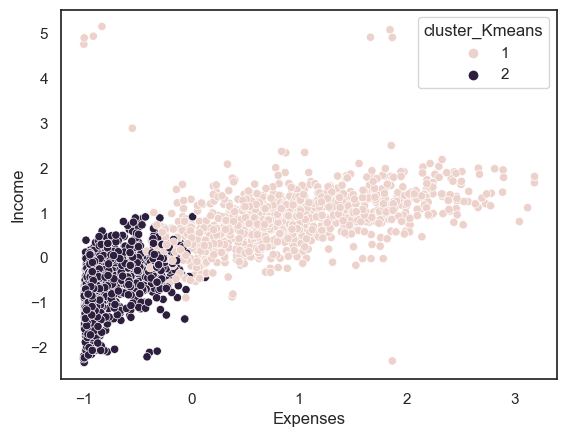

In [105]:
sns.scatterplot(copy_data['Expenses'],copy_data['Income'],hue = copy_data['cluster_Kmeans'])

## pca with Agglomerative clustering

In [106]:
df.head()

,Education,Marital_Status,Income,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge,Customer_For
0,0,1,0.288947,-1.264308,1.680176,1.319340,-0.438933,1.016868,1.975467
1,0,1,-0.262003,1.395139,-0.962202,-1.155857,-0.438933,1.273264,-1.667017
2,0,0,0.918423,-1.264308,0.282541,0.798246,-0.438933,0.333146,-0.172996
3,0,0,-1.182183,0.065416,-0.918994,-0.895310,-0.438933,-1.290693,-1.925349
4,0,0,0.296187,0.065416,-0.305762,0.537699,-0.438933,-1.034298,-0.823131


In [107]:
copy_data01 = df.copy()

In [108]:
copy_data01.head()

,Education,Marital_Status,Income,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge,Customer_For
0,0,1,0.288947,-1.264308,1.680176,1.319340,-0.438933,1.016868,1.975467
1,0,1,-0.262003,1.395139,-0.962202,-1.155857,-0.438933,1.273264,-1.667017
2,0,0,0.918423,-1.264308,0.282541,0.798246,-0.438933,0.333146,-0.172996
3,0,0,-1.182183,0.065416,-0.918994,-0.895310,-0.438933,-1.290693,-1.925349
4,0,0,0.296187,0.065416,-0.305762,0.537699,-0.438933,-1.034298,-0.823131


In [109]:
from sklearn.decomposition import PCA
#initiating pca to reduce  dimentions  to 3...
pca = PCA(n_components=3)
pca.fit(copy_data01)
PCA_ds = pd.DataFrame(pca.transform(copy_data01),columns=(['col1','col2','col3']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,-1.529288e-17,1.726866,-2.826189,-1.609200,-0.271412,1.388004,5.664182
col2,2236.0,-4.796402e-17,1.062690,-2.912907,-0.803814,-0.008308,0.749572,3.380579
col3,2236.0,-3.818254e-17,1.027114,-2.621440,-0.772523,-0.024543,0.767535,3.039268


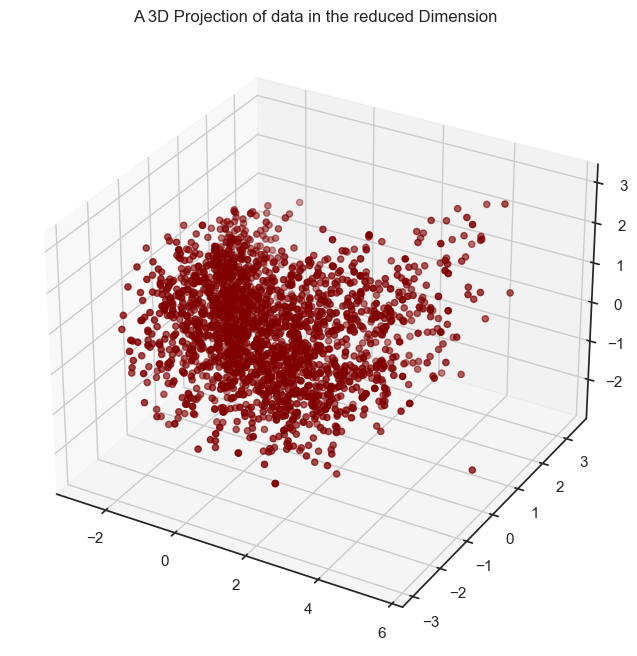

In [110]:
#we are ploting 3d plots for that 3 colms...
#A 3D projection of data in the reduced dimention..
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

#plot
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x,y,z, c = 'maroon', marker = 'o')
ax.set_title('A 3D Projection of data in the reduced Dimension ')

plt.show()

In [111]:
#now we perform the agglomerative clustering 

In [112]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

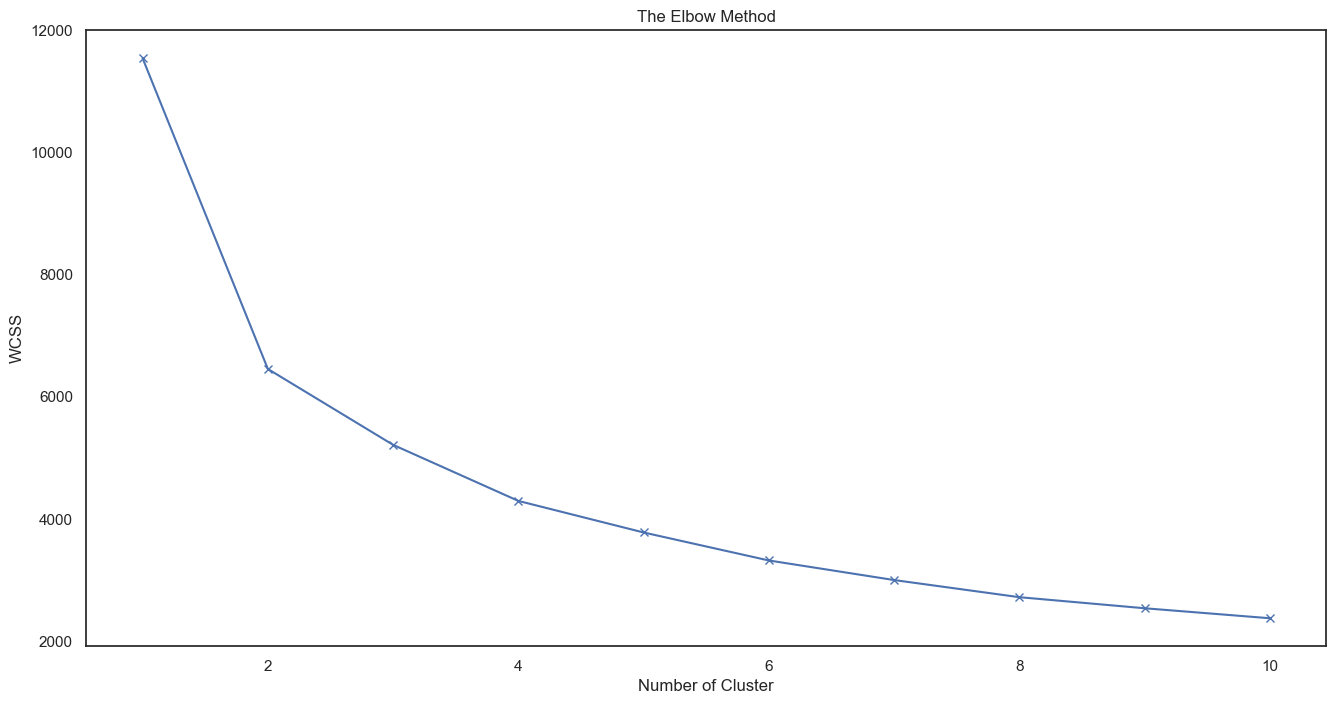

In [113]:
wcss = []
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state = 42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

WCSS is the sum of the squared distance bet each point and the centroid in a cluster....

wcss value is more less for k=2 here, so we take k=2 

In [114]:
#initiating the alggomerative Clustring model
AC = AgglomerativeClustering(n_clusters = 2)

#Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds['Clusters']=yhat_AC

##Adding the clusters feature to the original dataframe..
copy_data01['Cluster_Agglomerative']=yhat_AC + 1

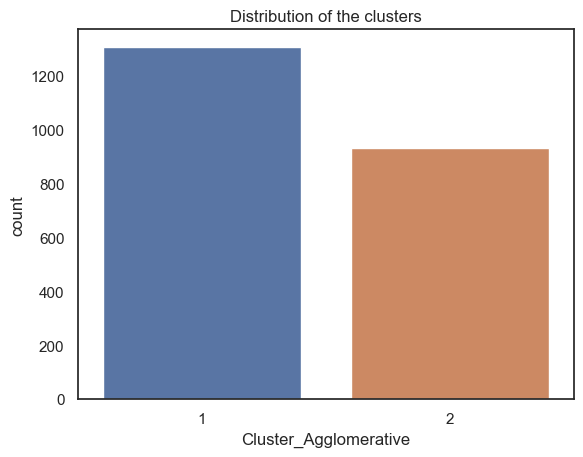

In [125]:
sns.countplot(x=copy_data01['Cluster_Agglomerative'])
plt.title("Distribution of the clusters")
plt.show()

In [116]:
copy_data01.head()

,Education,Marital_Status,Income,kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,CustomerAge,Customer_For,Cluster_Agglomerative
0,0,1,0.288947,-1.264308,1.680176,1.319340,-0.438933,1.016868,1.975467,2
1,0,1,-0.262003,1.395139,-0.962202,-1.155857,-0.438933,1.273264,-1.667017,1
2,0,0,0.918423,-1.264308,0.282541,0.798246,-0.438933,0.333146,-0.172996,2
3,0,0,-1.182183,0.065416,-0.918994,-0.895310,-0.438933,-1.290693,-1.925349,1
4,0,0,0.296187,0.065416,-0.305762,0.537699,-0.438933,-1.034298,-0.823131,1


<AxesSubplot:xlabel='Expenses', ylabel='Income'>

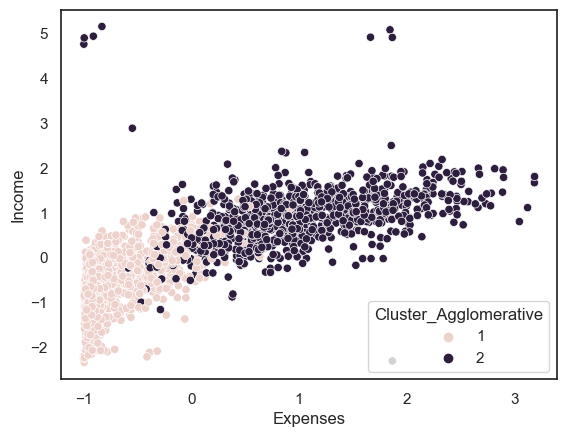

In [117]:
sns.scatterplot(copy_data01['Expenses'],copy_data01['Income'],hue = copy_data01['Cluster_Agglomerative'])

cluster 1 -> those people who are spending less\
cluster 2 -> those people who are spending more

In [118]:
#now we draw some outcomes

<AxesSubplot:xlabel='kids', ylabel='Income'>

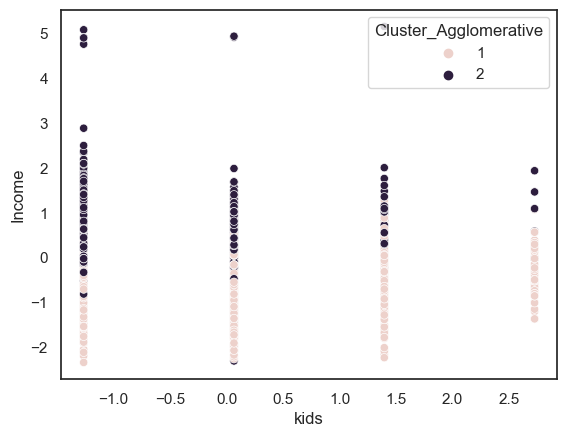

In [119]:
sns.scatterplot(copy_data01['kids'],copy_data01['Income'],hue = copy_data01['Cluster_Agglomerative'])

we observe that the number of kids are more in those peoples are falling in cluster 2 & the people who having less no of kids are falling in cluster 1

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

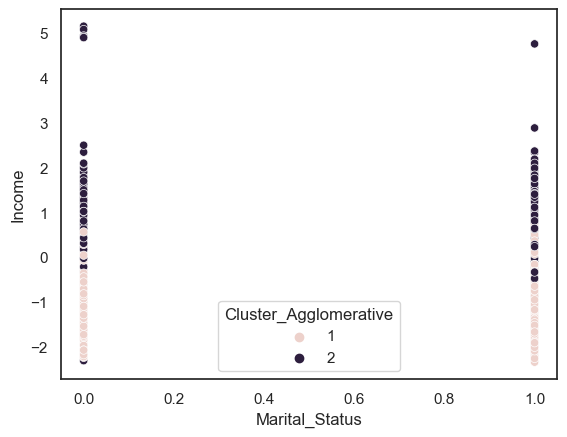

In [120]:
sns.scatterplot(copy_data01['Marital_Status'],copy_data01['Income'],hue = copy_data01['Cluster_Agglomerative'])

So, here both the people are having same kind of relationship so this dosen't give any outcomes...

<AxesSubplot:xlabel='Marital_Status', ylabel='Expenses'>

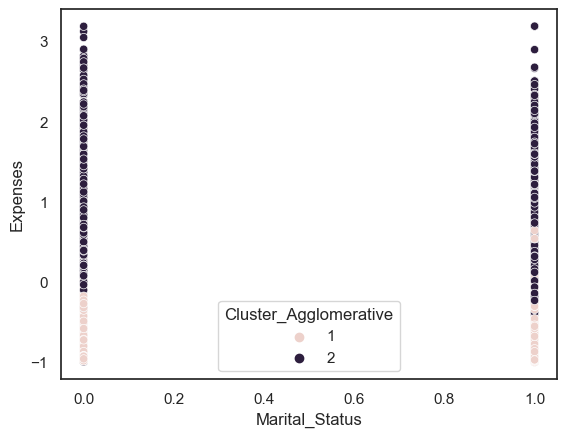

In [121]:
sns.scatterplot(copy_data01['Marital_Status'],copy_data01['Expenses'],hue = copy_data01['Cluster_Agglomerative'])

<AxesSubplot:xlabel='Income', ylabel='CustomerAge'>

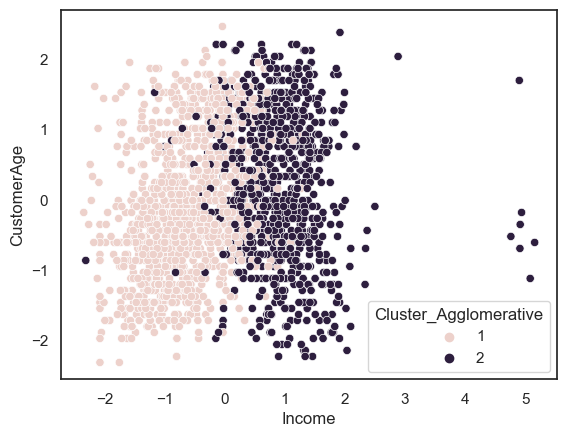

In [122]:
sns.scatterplot(copy_data01['Income'],copy_data01['CustomerAge'],hue = copy_data01['Cluster_Agglomerative'])

here we can see the people who are having less income are falling in cluster 1...\
and the people having more income are falling in cluster 2...

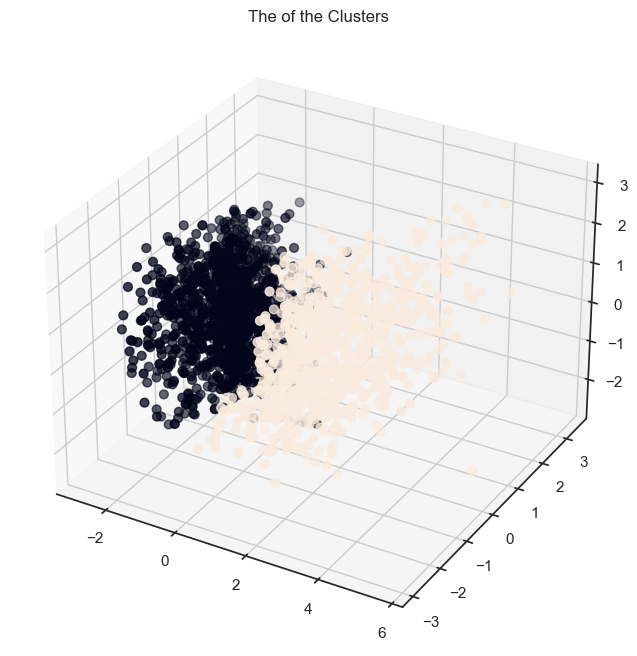

In [123]:
#plotting the cluster
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x,y,z, s =40, c= PCA_ds['Clusters'],marker= 'o')
ax.set_title("The of the Clusters")
plt.show()

This is the final result like you can see how properly the two clusters are segregated .

# Conclusions:

## Cluster 1:

People with less expenses

people who are married and parents of more than 3 kids

people which low income

## cluster 2:

people with more expenses 

people who are single or parents who have less than 3 kids.

people with high income

age is not the criteria but it is observed to some extent that people who are older fall in this group

So, the customers falling in cluster 2 likes to spend more....so the firms can target people falling in cluster 2 for the sale of their Produscts.